# 참조 
### https://m.blog.naver.com/PostView.nhn?blogId=kmh03214&logNo=221745095018&proxyReferer=https:%2F%2Fwww.google.com%2F

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

In [2]:
# loading img
import PIL.Image as Image

def resize_img(img,size):
    return img.resize(size)

def load_img(file_path):
    data = []
    print(file_path + '/')
    for f in os.listdir(file_path):
        data.append(resize_img(Image.open(file_path + '/' + f) , (256,256)))
    return data

train_persons = load_img('./train/person') # img_data_list / element is image not nparray
val_persons = load_img('./val/person')
test_persons = load_img('./test/person')

train_nopersons = load_img('./train/noperson')
val_nopersons = load_img('./val/noperson')
test_nopersons = load_img('./test/noperson')


./train/person/
./val/person/
./test/person/
./train/noperson/
./val/noperson/
./test/noperson/


In [3]:
# We have to img -> array & labeling solution
def img_to_array(img):
    return np.array(img, dtype = 'float32')/255.0

train_persons_arr,train_persons_sol = np.array([img_to_array(person) for person in train_persons]),np.array([1]*len(train_persons))
val_persons_arr,val_persons_sol = np.array([img_to_array(person) for person in val_persons]),np.array([1]*len(val_persons))
test_persons_arr,test_persons_sol = np.array([img_to_array(person) for person in test_persons]),np.array([1]*len(test_persons))

train_nopersons_arr,train_nopersons_sol = np.array([img_to_array(noperson) for noperson in train_nopersons]),np.array([0]*len(train_nopersons))
val_nopersons_arr,val_nopersons_sol = np.array([img_to_array(noperson) for noperson in val_nopersons]),np.array([0]*len(val_nopersons))
test_nopersons_arr,test_nopersons_sol = np.array([img_to_array(noperson) for noperson in test_nopersons]),np.array([0]*len(test_nopersons))

train_img,train_sol = np.concatenate((train_persons_arr,train_nopersons_arr)),np.concatenate((train_persons_sol,train_nopersons_sol))
val_img,val_sol = np.concatenate((val_persons_arr,val_nopersons_arr)),np.concatenate((val_persons_sol,val_nopersons_sol))
test_img,test_sol = np.concatenate((test_persons_arr,test_nopersons_arr)),np.concatenate((test_persons_sol,test_nopersons_sol))


In [4]:
# train model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (5,5),padding = 'same', input_shape = (256,256,3)))
model.add(keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(keras.layers.Conv2D(128, (5,5), padding = 'same'))
model.add(keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(256,(5,5), padding = 'same'))
model.add(keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)))

model.add(keras.layers.Flatten())
# FC layer 1
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(keras.layers.Dropout(0.2))

# FC layer 2
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(keras.layers.Dropout(0.2))

# FC layer 3
model.add(keras.layers.Dense(64))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = keras.optimizers.Adam(lr = 1e-4,) , metrics=['accuracy'])

In [5]:
model.summary()
print(train_img.shape)
print(train_sol)
print(val_img.shape)
print(val_sol.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     5

In [6]:
history = model.fit(x = train_img, 
                    y = train_sol, 
                    batch_size = 16, 
                    epochs = 100,
                    verbose=1,
                    validation_data = (val_img,val_sol))

Epoch 1/100
125/125 [==============================] - 29s 230ms/step - loss: 0.2928 - accuracy: 0.8740 - val_loss: 4.2816 - val_accuracy: 0.5000
Epoch 2/100
125/125 [==============================] - 28s 227ms/step - loss: 0.1737 - accuracy: 0.9345 - val_loss: 4.1124 - val_accuracy: 0.5000
Epoch 3/100
125/125 [==============================] - 28s 227ms/step - loss: 0.1167 - accuracy: 0.9575 - val_loss: 2.8221 - val_accuracy: 0.5000
Epoch 4/100
125/125 [==============================] - 28s 227ms/step - loss: 0.1179 - accuracy: 0.9550 - val_loss: 1.3921 - val_accuracy: 0.5500
Epoch 5/100
125/125 [==============================] - 28s 228ms/step - loss: 0.0687 - accuracy: 0.9800 - val_loss: 0.5595 - val_accuracy: 0.7500
Epoch 6/100
125/125 [==============================] - 29s 229ms/step - loss: 0.0790 - accuracy: 0.9745 - val_loss: 0.4912 - val_accuracy: 0.7900
Epoch 7/100
125/125 [==============================] - 29s 228ms/step - loss: 0.0760 - accuracy: 0.9755 - val_loss: 0.2884 -

In [7]:
model.evaluate(test_img,test_sol,batch_size = 16)

13/13 [==============================] - 1s 53ms/step - loss: 4.4362e-05 - accuracy: 1.0000


[4.436233211890794e-05, 1.0]

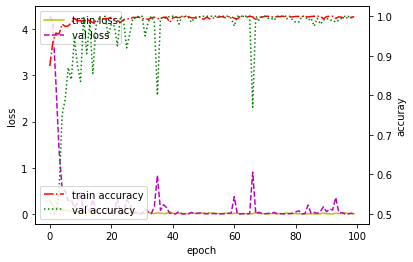

_total.png


In [8]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()
loss_ax.plot(history.history['loss'], 'y-', label='train loss')
loss_ax.plot(history.history['val_loss'], 'm--', label='val loss')
acc_ax.plot(history.history['accuracy'], 'r-.', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g:', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

fig = plt.gcf()
plt.show()

model_name = "_total.png"
fig.savefig(model_name, dpi=fig.dpi)
print(model_name)

In [9]:
# model.save_weights("model_01_23_pixel256.h5")

In [10]:
import random

def classify_model(arr):
    pre = model.predict(arr.reshape(1,256,256,3))
    if pre > 0.5:
        return 'person'
    else:
        return 'noperson'

person


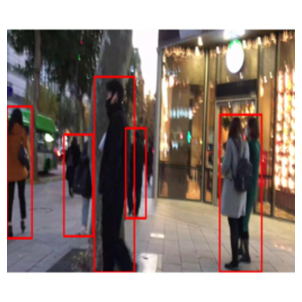

person


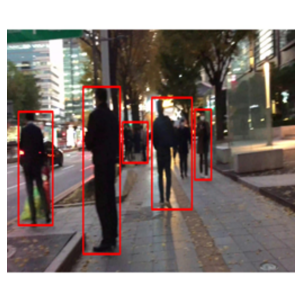

person


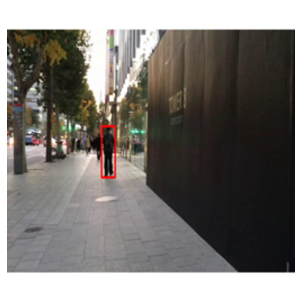

person


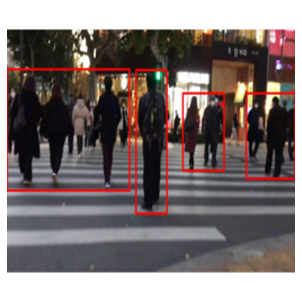

person


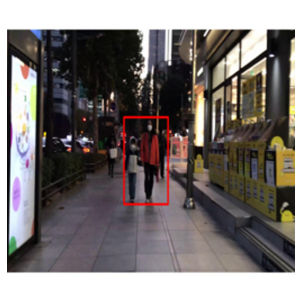

person


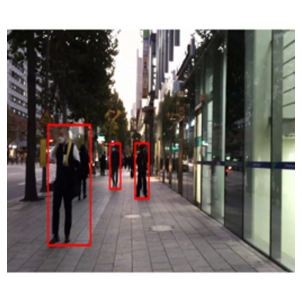

person


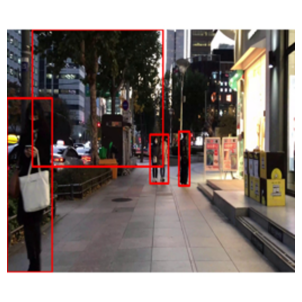

person


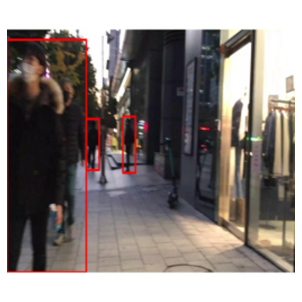

person


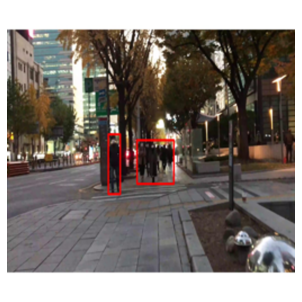

person


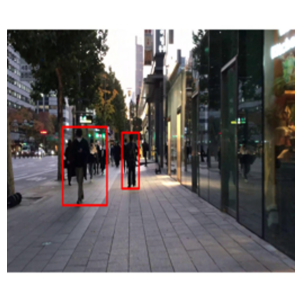

In [11]:
for i in range(10):
    num = random.randint(0,len(test_persons)-1)
    print(classify_model(test_persons_arr[num]))
    plt.imshow(test_persons[num].resize((512,512)))
    plt.axis('off'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
    plt.show()

noperson


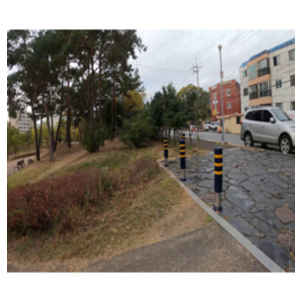

noperson


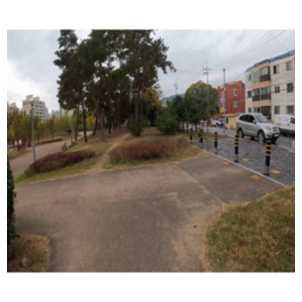

noperson


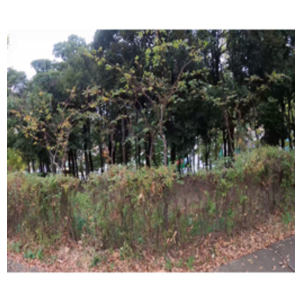

noperson


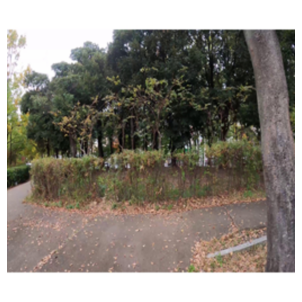

noperson


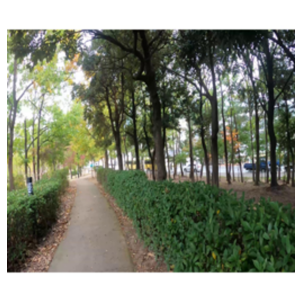

noperson


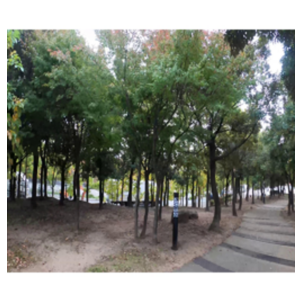

noperson


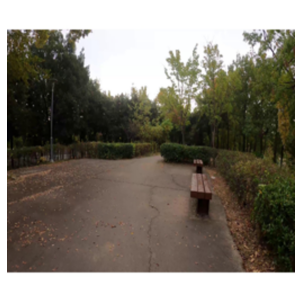

noperson


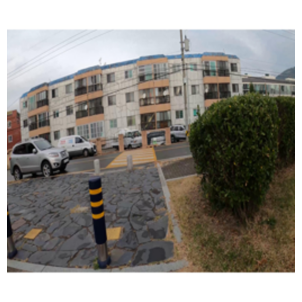

noperson


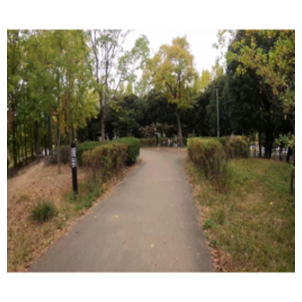

noperson


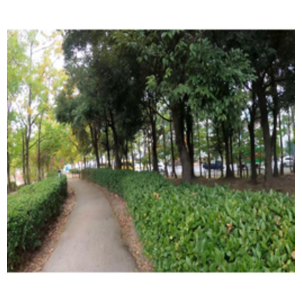

In [12]:
for i in range(10):
    num = random.randint(0,len(test_nopersons)-1)
    print(classify_model(test_nopersons_arr[num]))
    plt.imshow(test_nopersons[num].resize((512,512)))
    plt.axis('off'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
    plt.show()

Instructions for updating:
Please use `model.predict()` instead.


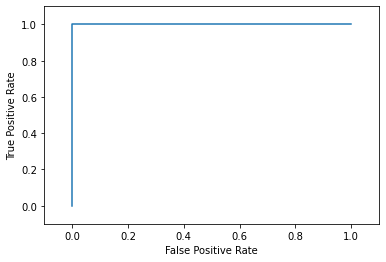

In [13]:
test_prob=model.predict_proba(test_img)

from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (test_sol, test_prob)

def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([-0.1,1.1,-0.1,1.1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
  
plot_roc_curve (fpr,tpr) 